In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    if degree > 1:
        for power in range(2, degree+1):
            name = 'power_' + str(power)
            poly_dataframe[name] = feature.apply(lambda x: x**power)
    return poly_dataframe

In [3]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 
              'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float,
              'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int,
              'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [4]:
sales = pd.read_csv(r"D:\regression\Project 5\data\kc_house_data.csv", dtype=dtype_dict)
sales = sales.sort_values(['sqft_living','price'])   #break the tie by their prices

In [5]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0.0,0.00,290.0,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620.0,22850.0
15381,2856101479,20140701T000000,276000.0,1.0,0.75,370.0,1801,1.0,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340.0,5000.0
860,1723049033,20140620T000000,245000.0,1.0,0.75,380.0,15000,1.0,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170.0,15000.0
18379,1222029077,20141029T000000,265000.0,0.0,0.75,384.0,213444,1.0,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920.0,224341.0
4868,6896300380,20141002T000000,228000.0,0.0,1.00,390.0,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170.0,6000.0


# degree 15

In [6]:
poly15_data = polynomial_dataframe(sales['sqft_living'], 15)
poly15_data.head()

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15
19452,290.0,84100.0,24389000.0,7.072810e+09,2.051115e+12,5.948233e+14,1.724988e+17,5.002464e+19,1.450715e+22,4.207072e+24,1.220051e+27,3.538148e+29,1.026063e+32,2.975582e+34,8.629189e+36
15381,370.0,136900.0,50653000.0,1.874161e+10,6.934396e+12,2.565726e+15,9.493188e+17,3.512479e+20,1.299617e+23,4.808584e+25,1.779176e+28,6.582952e+30,2.435692e+33,9.012061e+35,3.334463e+38
860,380.0,144400.0,54872000.0,2.085136e+10,7.923517e+12,3.010936e+15,1.144156e+18,4.347792e+20,1.652161e+23,6.278212e+25,2.385721e+28,9.065738e+30,3.444980e+33,1.309093e+36,4.974552e+38
18379,384.0,147456.0,56623104.0,2.174327e+10,8.349416e+12,3.206176e+15,1.231172e+18,4.727699e+20,1.815436e+23,6.971275e+25,2.676970e+28,1.027956e+31,3.947353e+33,1.515783e+36,5.820608e+38
4868,390.0,152100.0,59319000.0,2.313441e+10,9.022420e+12,3.518744e+15,1.372310e+18,5.352009e+20,2.087284e+23,8.140406e+25,3.174758e+28,1.238156e+31,4.828807e+33,1.883235e+36,7.344616e+38


In [7]:
my_features = poly15_data.columns
print(my_features)

Index(['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6',
       'power_7', 'power_8', 'power_9', 'power_10', 'power_11', 'power_12',
       'power_13', 'power_14', 'power_15'],
      dtype='object')


In [8]:
l2_small_penalty = 1.5e-5

In [9]:
model15=Ridge(alpha=l2_small_penalty, normalize=True)

In [10]:
model15.fit(poly15_data,sales['price'])

Ridge(alpha=1.5e-05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [11]:
print(model15.intercept_,model15.coef_)

220664.375053195 [ 1.24873306e+02 -4.77376011e-02  3.01446238e-05 -2.44419942e-09
 -1.94153675e-13  8.54085686e-18  1.51142121e-21  8.27979094e-26
  6.52603100e-31 -3.27895017e-34 -3.87962315e-38 -2.72437650e-42
 -1.07790800e-46  3.78242694e-51  1.39790296e-54]


Text(0.5,1,'overfit because of small l2 penalty')

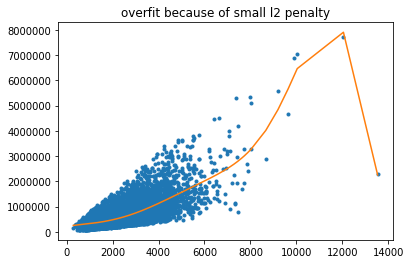

In [12]:
plt.plot(poly15_data['power_1'],sales['price'],'.',poly15_data['power_1'], model15.predict(poly15_data),'-')
plt.title("overfit because of small l2 penalty")

In [13]:
set_1 = pd.read_csv(r"D:\regression\Project 5\data\kc_house_set_1_data.csv", dtype=dtype_dict)
set_2 = pd.read_csv(r"D:\regression\Project 5\data\kc_house_set_2_data.csv", dtype=dtype_dict)
set_3 = pd.read_csv(r"D:\regression\Project 5\data\kc_house_set_3_data.csv", dtype=dtype_dict)
set_4 = pd.read_csv(r"D:\regression\Project 5\data\kc_house_set_4_data.csv", dtype=dtype_dict)

#### The four curves should differ from one another a lot, as should the coefficients.

In [14]:
l2_small_penalty=1e-9

In [15]:
def plot_15degree(df,l2_penalty):
    poly15_data = polynomial_dataframe(df['sqft_living'], 15)
    my_features = poly15_data.columns
    model15=Ridge(alpha=l2_penalty, normalize=True)
    model15.fit(poly15_data,df['price'])
    print(model15.intercept_,model15.coef_)
    plt.plot(poly15_data['power_1'],df['price'],'.',poly15_data['power_1'], model15.predict(poly15_data),'-')

23888.82535997266 [ 5.44669399e+02 -3.55447605e-01  1.22446380e-04 -1.17175307e-08
 -3.90512698e-13 -1.39075910e-17  1.47860283e-20  6.87491630e-25
 -7.57203971e-29 -1.04097276e-32 -3.71844269e-37  3.39989255e-41
  5.56592051e-45  2.53761389e-49 -3.35152915e-53]


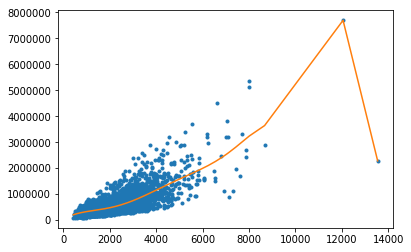

In [16]:
plot_15degree(set_1,l2_small_penalty)

-55614.64099182631 [ 8.59362651e+02 -8.18118278e-01  4.28879983e-04 -9.12770660e-08
 -2.69604404e-12  3.73980300e-15 -1.42711882e-19 -6.30794703e-23
 -1.44559628e-27  7.44321353e-31  9.25865883e-35  3.28010472e-41
 -1.29543508e-42 -1.38781255e-46  1.66546444e-50]


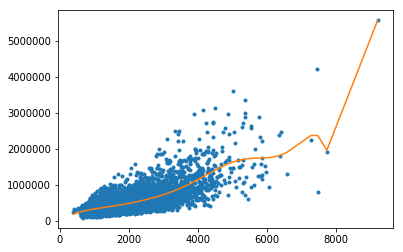

In [17]:
plot_15degree(set_2,l2_small_penalty)

470987.874343337 [-7.55395963e+02  9.75579541e-01 -4.58946006e-04  7.77958112e-08
  7.15013417e-12 -2.88602002e-15 -2.13677720e-20  3.38085194e-23
  2.19178226e-27 -1.97067793e-31 -4.15993202e-35 -1.80196143e-39
  3.19071198e-43  5.08456859e-47 -3.93304243e-51]


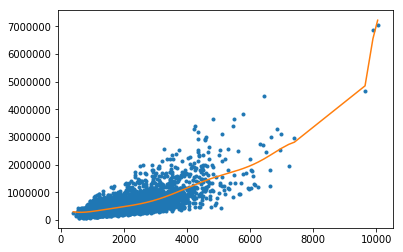

In [18]:
plot_15degree(set_3,l2_small_penalty)

-145655.61848234967 [ 1.11944571e+03 -9.83760212e-01  3.38770897e-04  3.60377210e-08
 -4.37814017e-11  5.77191690e-15  7.66795221e-19 -9.49297664e-23
 -1.96030821e-26 -2.10880284e-32  3.31005065e-34  3.47733891e-38
 -2.43039323e-42 -8.79553219e-46  6.44569659e-50]


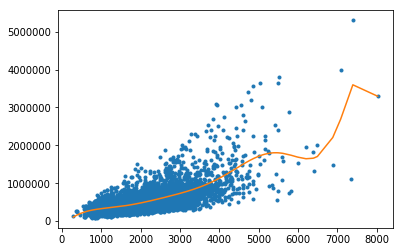

In [19]:
plot_15degree(set_4,l2_small_penalty)

#### the coefficient of feature power_1 varies from -7.55395963e+02 to 1.11944571e+03

Generally, whenever we see weights change so much in response to change in data, we believe the variance of our estimate to be large. Ridge regression aims to address this issue by penalizing "large" weights. (The weights looked quite small, but they are not that small because 'sqft_living' input is in the order of thousands.)

## large l2 penalty
These curves should vary a lot less, now that we have introduced regularization.

In [20]:
l2_large_penalty=1.23e2

539103.0310577955 [2.32806803e+00 3.53621608e-04 3.31969692e-08 2.00082477e-12
 1.11492559e-16 6.57786122e-21 4.12939525e-25 2.70393755e-29
 1.81614763e-33 1.23824277e-37 8.51872481e-42 5.89455598e-46
 4.09542560e-50 2.85464889e-54 1.99547476e-58]


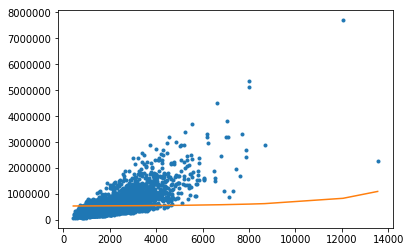

In [21]:
plot_15degree(set_1,l2_large_penalty)

529853.0253577976 [2.09756903e+00 3.90817483e-04 6.67189944e-08 8.90002997e-12
 9.72639877e-16 9.69733682e-20 9.50564475e-24 9.44491031e-28
 9.57191338e-32 9.86945155e-36 1.03101115e-39 1.08729784e-43
 1.15453748e-47 1.23211305e-51 1.31986696e-55]


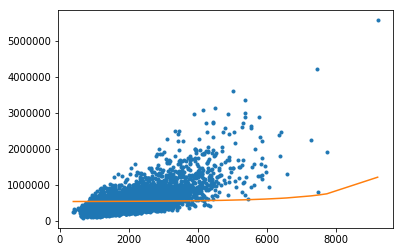

In [22]:
plot_15degree(set_2,l2_large_penalty)

533640.1140974432 [2.28906258e+00 4.12472190e-04 6.08835345e-08 6.58572163e-12
 6.15278155e-16 5.64446634e-20 5.28834396e-24 5.07091402e-28
 4.94657273e-32 4.88043809e-36 4.85009106e-40 4.84161534e-44
 4.84635021e-48 4.85883628e-52 4.87558469e-56]


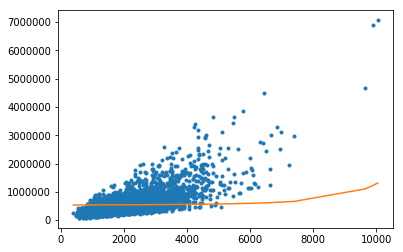

In [23]:
plot_15degree(set_3,l2_large_penalty)

524562.9690466832 [2.08596194e+00 4.05035772e-04 7.46864647e-08 1.13096608e-11
 1.45864442e-15 1.73561251e-19 2.01609632e-23 2.34605255e-27
 2.75636073e-31 3.27043069e-35 3.91046855e-39 4.70118041e-43
 5.67212304e-47 6.85958087e-51 8.30843630e-55]


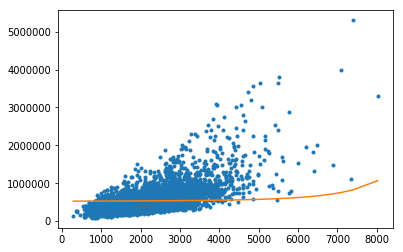

In [24]:
plot_15degree(set_4,l2_large_penalty)

#### the coefficient of feature power_1 varies from 2.08596194 to 2.32806803.

# Selecting an L2 penalty via 10-fold cross-validation

In [25]:
train_valid_shuffled = pd.read_csv(r"D:\regression\Project 5\data\kc_house_train_valid_shuffled.csv", dtype=dtype_dict)
test = pd.read_csv(r"D:\regression\Project 5\data\kc_house_test_data.csv", dtype=dtype_dict)
test = test.sort_values(['sqft_living','price'])

In [26]:
n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation

for i in range(k):
    start = (n*i)//k
    end = (n*(i+1))//k-1
    print (i, (start, end))

0 (0, 1938)
1 (1939, 3878)
2 (3879, 5817)
3 (5818, 7757)
4 (7758, 9697)
5 (9698, 11636)
6 (11637, 13576)
7 (13577, 15515)
8 (15516, 17455)
9 (17456, 19395)


In [27]:
train_valid_shuffled[0:10] # select rows 0 to 9

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2780400035,20140505T000000,665000.0,4.0,2.50,2800.0,5900,1.0,0,0,...,8,1660,1140,1963,0,98115,47.6809,-122.286,2580.0,5900.0
1,1703050500,20150321T000000,645000.0,3.0,2.50,2490.0,5978,2.0,0,0,...,9,2490,0,2003,0,98074,47.6298,-122.022,2710.0,6629.0
2,5700002325,20140605T000000,640000.0,3.0,1.75,2340.0,4206,1.0,0,0,...,7,1170,1170,1917,0,98144,47.5759,-122.288,1360.0,4725.0
3,0475000510,20141118T000000,594000.0,3.0,1.00,1320.0,5000,1.0,0,0,...,7,1090,230,1920,0,98107,47.6674,-122.365,1700.0,5000.0
4,0844001052,20150128T000000,365000.0,4.0,2.50,1904.0,8200,2.0,0,0,...,7,1904,0,1999,0,98010,47.3107,-122.001,1560.0,12426.0
5,2781280290,20150427T000000,305000.0,3.0,2.50,1610.0,3516,2.0,0,0,...,8,1610,0,2006,0,98055,47.4491,-122.188,1610.0,3056.0
6,2214800630,20141105T000000,239950.0,3.0,2.25,1560.0,8280,2.0,0,0,...,7,1560,0,1979,0,98001,47.3393,-122.259,1920.0,8120.0
7,2114700540,20141021T000000,366000.0,3.0,2.50,1320.0,4320,1.0,0,0,...,6,660,660,1918,0,98106,47.5327,-122.347,1190.0,4200.0
8,2596400050,20140730T000000,375000.0,3.0,1.00,1960.0,7955,1.0,0,0,...,7,1260,700,1963,0,98177,47.7641,-122.364,1850.0,8219.0
9,4140900050,20150126T000000,440000.0,4.0,1.75,2180.0,10200,1.0,0,2,...,8,2000,180,1966,0,98028,47.7638,-122.270,2590.0,10445.0


In [28]:
def k_fold_cross_validation(k, l2_penalty, data, output):
    rss_list=[]
    for i in range(k):
        #dividing data into training and validation set
        start = (n*i)//k
        end = (n*(i+1))//k-1
        valid_data=data[start:end+1]
        valid_output=output[start:end+1]
        train_data=data[0:start].append(data[end+1:n])
        train_output=output[0:start].append(output[end+1:n])
        #training model
        model15=Ridge(alpha=l2_penalty, normalize=True)
        model15.fit(train_data,train_output)
        #rss
        y_hat=model15.predict(valid_data)
        rss=np.sum((valid_output-y_hat)**2)
        rss_list.append(rss)
    average_validation_error=np.mean(rss_list)
    return average_validation_error

In [29]:
data=polynomial_dataframe(train_valid_shuffled['sqft_living'], 15)

In [30]:
output=train_valid_shuffled['price']

In [31]:
l2_penalty = np.logspace(3, 9, num=13)
l2_penalty

array([1.00000000e+03, 3.16227766e+03, 1.00000000e+04, 3.16227766e+04,
       1.00000000e+05, 3.16227766e+05, 1.00000000e+06, 3.16227766e+06,
       1.00000000e+07, 3.16227766e+07, 1.00000000e+08, 3.16227766e+08,
       1.00000000e+09])

In [32]:
rss=[(k_fold_cross_validation(10,p,data,output),p) for p in l2_penalty]

In [33]:
min(rss)

(264977361036975.94, 1000.0)

In [34]:
model15=Ridge(alpha=1000.0, normalize=True)  #train to full training data set
model15.fit(data,output)

Ridge(alpha=1000.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [35]:
test_data = polynomial_dataframe(test['sqft_living'], 15)

In [36]:
y_hat=model15.predict(test_data)

In [37]:
rss = np.sum((test['price']-y_hat)**2)

In [38]:
rss

283856861224150.9

# Implementation from scratch

In [39]:
def get_numpy_data(df,features,output):
    '''
    i/p: df: data table in data frame format
            features: x input name list. According to this list a feature matrix will be created in numpy 2D aray
            output: single target name which will be converted into numpy vector
    o/p: feature matrix, y vector in numpy array format'''
    df['constant']=1   #add a constant field for the intercept
    features=['constant']+features
    feature_matrix=df.as_matrix(columns=features)
    y_vector=df[output].values
    return feature_matrix,y_vector

In [40]:
def predict_output(feature_matrix,weights):
    '''
    i/p: feature_matrix: matrix F of equation Fw=y
         weights is a one D w vector in above equation
    o/p: predicted value y in above eq.
    '''
    y_hat=np.dot(feature_matrix,weights)
    return y_hat

## $Ridge\ regression\ cost\ =\ RSS(w) + \lambda \textbf{w}^T\textbf{w}$ 

In [41]:
def feature_derivative_ridge(errors,feature,weight,l2_penalty):
    '''
    i/p: errors=y-y_hat
         features=F
    o/p: d(RSS)/dw= -2H'(errors)+2(lambda)w Note:d is partial derivative and H' = transpose(H)
    '''
    derivative1=(-2)*np.dot(errors,feature)  #derivative of first term
    I=np.identity(len(weight))
    I[0,0]=0    #to exclude the intercept term
    derivative2=2*l2_penalty*np.dot(I,weight)
    derivative=derivative1+derivative2
    return derivative

In [42]:
#test derivative function
(example_features, example_output) = get_numpy_data(sales, ['sqft_living'], 'price')
my_weights = np.array([1., 10.])
test_predictions = predict_output(example_features, my_weights)
errors = example_output - test_predictions # prediction errors

# next two lines should print the same values
print (feature_derivative_ridge(errors, example_features, my_weights, 1))
print ('[%.8e %.8e]'%(-np.sum(errors)*2.,-np.sum(errors*example_features[:,1])*2+20.))


[-2.24467493e+10 -5.65541668e+13]
[-2.24467493e+10 -5.65541668e+13]


In [43]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations=100):
    weights = np.array(initial_weights) # make sure it's a numpy array
    for _ in range(max_iterations):
        prediction=predict_output(feature_matrix,weights)
        error=output-prediction
        derivative = feature_derivative_ridge(error,feature_matrix,weights,l2_penalty)
        weights-=step_size*derivative
    return weights

In [44]:
train_data = pd.read_csv(r"D:\regression\Project 5\data\kc_house_train_data.csv", dtype=dtype_dict)
test_data =  pd.read_csv(r"D:\regression\Project 5\data\kc_house_test_data.csv", dtype=dtype_dict)

In [45]:
simple_features = ['sqft_living']
my_output = 'price'
(simple_feature_matrix, output) = get_numpy_data(train_data, simple_features, my_output)
(simple_test_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)

#### Comparision of no penalty and high penalty model

In [46]:
step_size = 1e-12
max_iterations = 1000
initial_weights = np.array([0., 0.])

In [47]:
simple_weights_0_penalty= ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size,0,
                                                            max_iterations)

In [48]:
simple_weights_0_penalty

array([-8.55038595e-02,  2.64788506e+02])

In [49]:
simple_weights_high_penalty=ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size,1e11,
                                                            max_iterations)

In [50]:
simple_weights_high_penalty

array([ 6.96906922, 89.30826422])

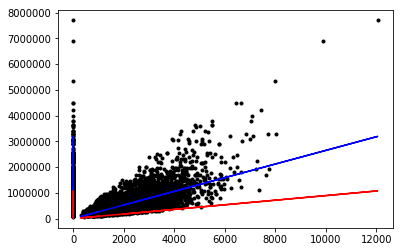

In [51]:
plt.plot(simple_feature_matrix,output,'k.',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_0_penalty),'b-',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_high_penalty),'r-')

Red line (higher penalty model-hpm) is steeper than the blue line (low penalty model-lpm). This implies that magnitude of 
coefficient of hpm must be significantly low than lpm and if we check the coefficient, the result confirms.

In [52]:
rss_zero_weights = np.sum((test['price']-predict_output(simple_test_feature_matrix,initial_weights))**2)

In [53]:
rss_no_regularization=np.sum((test['price']-predict_output(simple_test_feature_matrix,simple_weights_0_penalty))**2)

In [54]:
rss_high_regularization=np.sum((test['price']-predict_output(simple_test_feature_matrix,simple_weights_high_penalty))**2)

In [55]:
print(rss_zero_weights,rss_no_regularization,rss_high_regularization)

927913649762512.0 378546495511776.75 565293145230602.5


In [56]:
rss_zero_weights>rss_high_regularization and rss_high_regularization > rss_no_regularization

True

rss error is high for zero weights

In [57]:
model_features = ['sqft_living', 'sqft_living15']
my_output = 'price'
(feature_matrix, output) = get_numpy_data(train_data, model_features, my_output)
(test_feature_matrix, test_output) = get_numpy_data(test_data, model_features, my_output)

In [58]:
initial_weights = np.array([0., 0., 0.])

In [59]:
multiple_weights_0_penalty=ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, 0,
                                                            max_iterations)

In [60]:
multiple_weights_high_penalty=ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, 1e11,
                                                            max_iterations)

In [61]:
multiple_weights_0_penalty

array([-2.22154863e-01,  2.46527617e+02,  2.03795399e+01])

In [62]:
multiple_weights_high_penalty

array([ 5.32706595, 70.80524334, 61.63875935])

In [63]:
rss_zero_weights = np.sum((test['price']-predict_output(test_feature_matrix,initial_weights))**2)
rss_no_regularization=np.sum((test['price']-predict_output(test_feature_matrix,multiple_weights_0_penalty))**2)
rss_high_regularization=np.sum((test['price']-predict_output(test_feature_matrix,multiple_weights_high_penalty))**2)

In [64]:
print(rss_zero_weights,rss_no_regularization,rss_high_regularization)

927913649762512.0 373057759411940.1 453236963313769.3


In [65]:
rss_zero_weights>rss_high_regularization and rss_high_regularization > rss_no_regularization

True

In [66]:
print("Prediction of first house price in the test data using no penalty model is"
      ,predict_output(test_feature_matrix[0,:],multiple_weights_0_penalty))

Prediction of first house price in the test data using no penalty model is 514644.07502822403


In [67]:
print("Prediction of first house price in the test data using high penalty model is"
      ,predict_output(test_feature_matrix[0,:],multiple_weights_high_penalty))

Prediction of first house price in the test data using high penalty model is 281143.87181772204


In [68]:
print("actual price of the first house is",test['price'][0])

actual price of the first house is 323000.0


In [69]:
test['price'].iloc[0]

280000.0